# Assignment 3 Matteo Breganni 869549

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

from skimage import io
from skimage.color import rgb2ycbcr
from skimage.filters import gaussian
from skimage.color import ycbcr2rgb

drive.mount('/content/drive')

Mounted at /content/drive


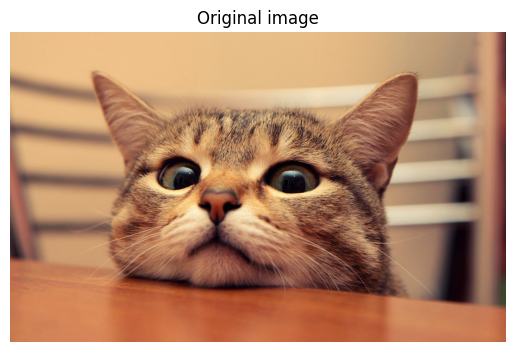

In [ ]:
image = io.imread('/content/drive/My Drive/cat.jpg')

plt.imshow(image)
plt.title("Original image")
plt.axis('off')
plt.show()

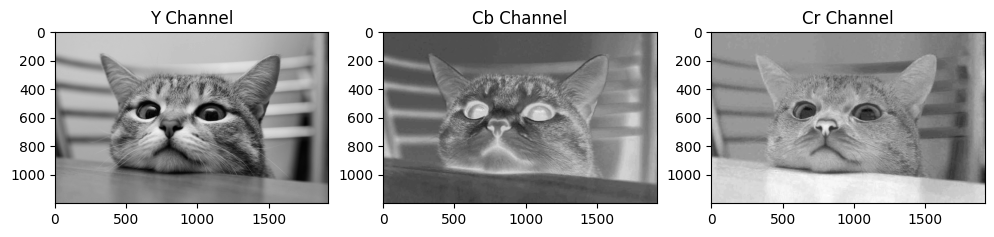

In [ ]:
if image.shape[2] == 4:
  image = image[:, :, :3]  # Keep only the first three channels (RGB), removes the transparency channel of the png file (I switched to a jpg image later so this is not needed anymore)

ycbcr_image = rgb2ycbcr(image) # Convert the image to YCbCr color space

# Plot the Y, Cb and Cr channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(ycbcr_image[:, :, 0], cmap='gray')
axes[0].set_title('Y Channel')

axes[1].imshow(ycbcr_image[:, :, 1], cmap='gray')
axes[1].set_title('Cb Channel')

axes[2].imshow(ycbcr_image[:, :, 2], cmap='gray')
axes[2].set_title('Cr Channel')

plt.show()

In [ ]:
def compress_CbCr(im, sigma):
  ycbcr_blurred = im.copy() # Copy the image

  # Apply Gaussian blur to the Cb and Cr channels
  ycbcr_blurred[:, :, 1] = gaussian(im[:, :, 1], sigma=sigma)
  ycbcr_blurred[:, :, 2] = gaussian(im[:, :, 2], sigma=sigma)

  # Convert the blurred YCbCr image back to RGB
  im_cblur_rgb = ycbcr2rgb(ycbcr_blurred)

  # Scale the RGB values back to 0-255
  im_cblur_rgb = np.clip(im_cblur_rgb * 255, 0, 255).astype(np.uint8)

  return im_cblur_rgb

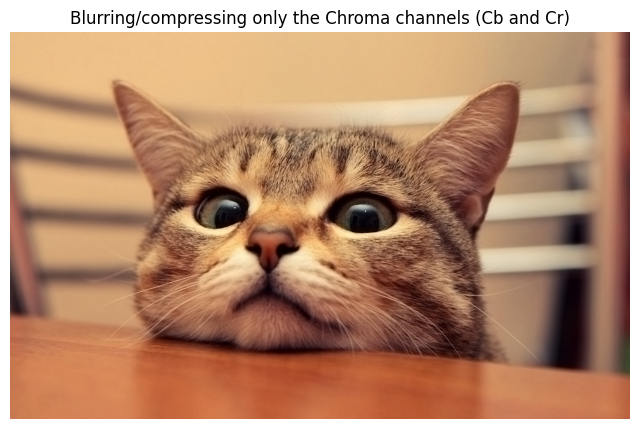

In [ ]:
# Compress the Cb and Cr channels
im_cblur = compress_CbCr(ycbcr_image, sigma=10)

# Display the blurred/compressed RGB image
plt.figure(figsize=(8, 6))
plt.imshow(im_cblur)
plt.title('Blurring/compressing only the Chroma channels (Cb and Cr)')
plt.axis('off')
plt.show()

In [ ]:
def compress_Y(im, sigma):
  ycbcr_blurred = im.copy() # Copy the image

  # Apply Gaussian blur to the Y channel
  ycbcr_blurred[:, :, 0] = gaussian(im[:, :, 0], sigma=sigma)

  # Convert the blurred YCbCr image back to RGB
  im_cblur_rgb = ycbcr2rgb(ycbcr_blurred)

  # Scale the RGB values back to 0-255
  im_cblur_rgb = np.clip(im_cblur_rgb * 255, 0, 255).astype(np.uint8)

  return im_cblur_rgb

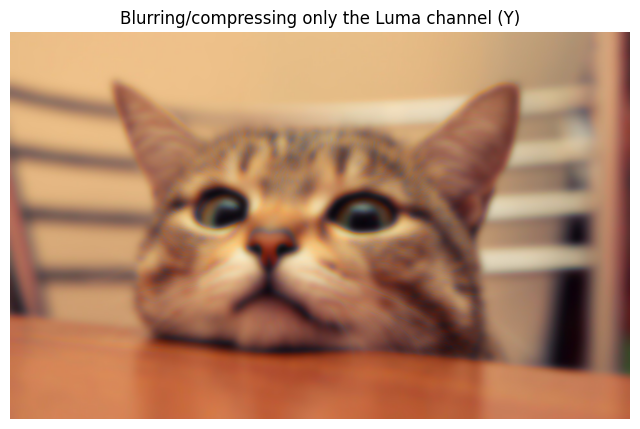

In [ ]:
# Compress the Cb and Cr channels
im_cblur = compress_Y(ycbcr_image, sigma=10)

# Display the blurred/compressed RGB image
plt.figure(figsize=(8, 6))
plt.imshow(im_cblur)
plt.title('Blurring/compressing only the Luma channel (Y)')
plt.axis('off')
plt.show()

This shows how our vision is much more sensitive to changes in in brightness, rather than changes is color.

The gaussian blurring filter describes how weights are distributed around a pixel. A larger sigma parameter means that the weights are spread over a larger area, leading to a greater blur effect.

Let's now see the differences between different sigmas, for the Cb and Cr channels and only for the Y channel.

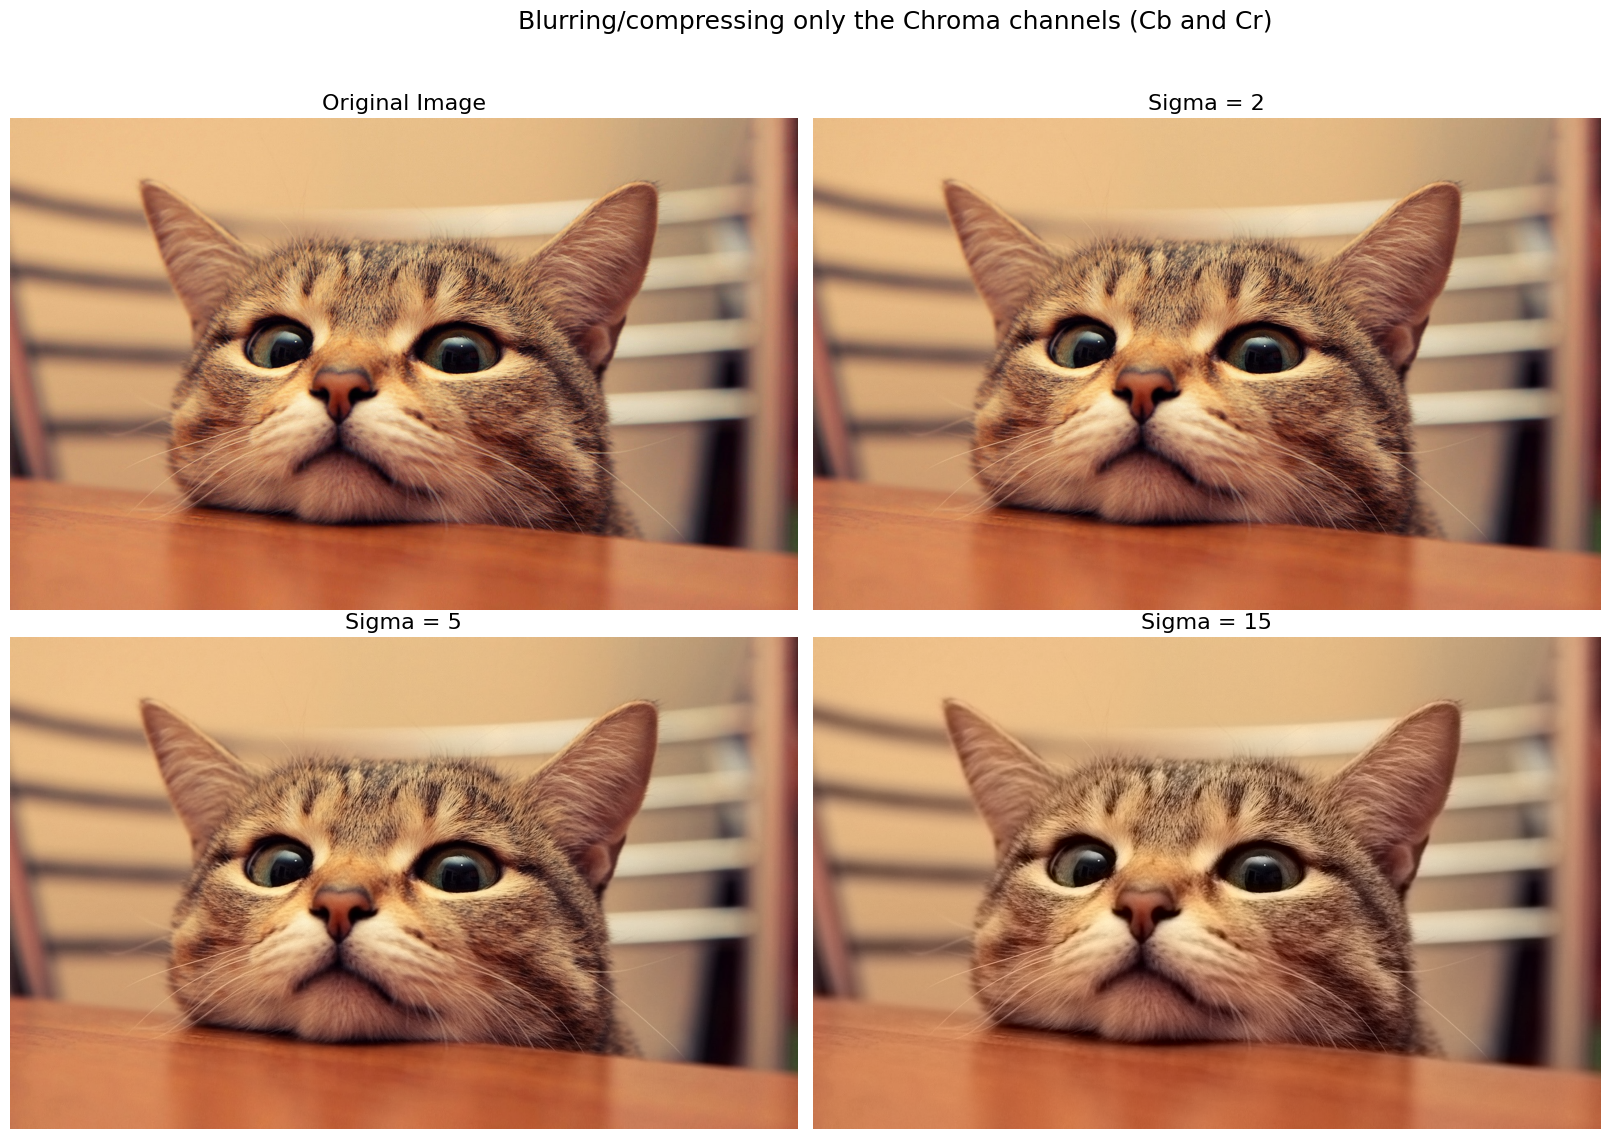

In [ ]:
# Compress the Cb and Cr channels at 3 different sigma levels
sigma_levels = [2, 5, 15]
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Display the original image
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image', fontsize=16)
axes[0, 0].axis('off')

# Display the blurred images for different sigma levels
for i, sigma in enumerate(sigma_levels):
   im_cblur = compress_CbCr(ycbcr_image, sigma)
   row = (i + 1) // 2
   col = (i + 1) % 2
   axes[row, col].imshow(im_cblur)
   axes[row, col].set_title(f"Sigma = {sigma}", fontsize=16)
   axes[row, col].axis('off')

plt.suptitle('Blurring/compressing only the Chroma channels (Cb and Cr)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()

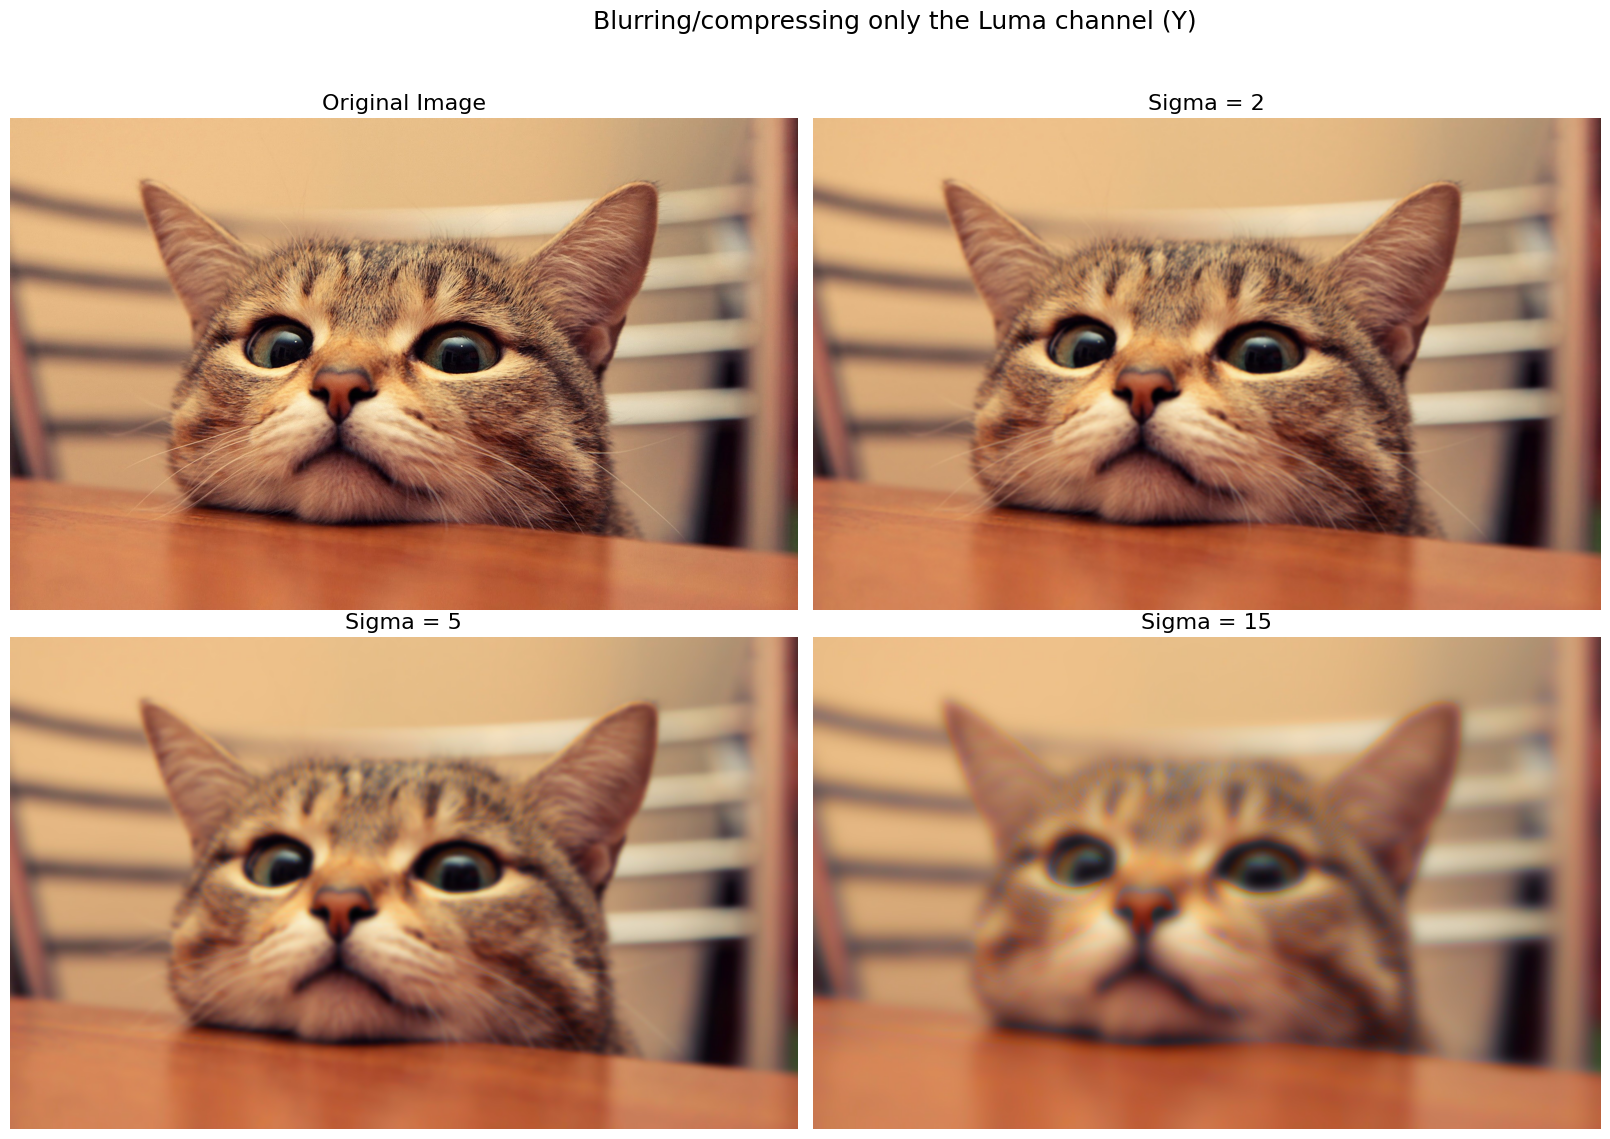

In [ ]:
# Compress the Cb and Cr channels at 3 different sigma levels
sigma_levels = [2, 5, 15]
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Display the original image
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image', fontsize=16)
axes[0, 0].axis('off')

# Display the blurred images for different sigma levels
for i, sigma in enumerate(sigma_levels):
   im_cblur = compress_Y(ycbcr_image, sigma)
   row = (i + 1) // 2
   col = (i + 1) % 2
   axes[row, col].imshow(im_cblur)
   axes[row, col].set_title(f"Sigma = {sigma}", fontsize=16)
   axes[row, col].axis('off')

plt.suptitle('Blurring/compressing only the Luma channel (Y)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show()

The difference is quite clear.

With gamma = 2 the difference in the CbCr compression is not even noticeable. With Y compression though, the blur is already moderately high and most of the details have been lost.

With gamma = 5 and gamma = 15 it becomes even clearer in what way the images are getting affected. In the first case, it's slowly losing color, but the details are still there, so it just looks less saturated. On the other hand with Y compression, the blur quickly destroys all detail, leaving behind only patches of bright color.